<a href="https://colab.research.google.com/github/pranav22b/projects/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip 'drive/My Drive/Dog vision/dog-breed-identification.zip' -d 'drive/My Drive/Dog vision'

# end to end Multiclass dog breed classification
This project builds an end to end multiclass dog breed classifier using Tensorflow 2.0 and Tensorflow Hub

# 1.Problem
Identifying a breed of the dog from a given image.

When I click a pic of a dog, I want to know what breed it is

# 2. Data
using data from kaggle https://www.kaggle.com/c/dog-breed-identification/data

# 3. Evaluation
The evaluation is a file of predictions of probability of each dog breed of test image

# 4. Features
Some info about the data:
  * We're using images(unstructured data), its best we use deep/transfer learning
  * there are 120 dog breeds
  * there are about 10000+ images in train data(with labels)
  * there are about 10000+ images in test data(no labels)

# Get work space ready
Things to do:
  * import tensorFlow 2.x
  * import tensor hub
  * make sure we're using GPU

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print('tensorflow version: ', tf.__version__)
print('tensor hub version: ', hub.__version__)
print('GPU available : yes' if tf.config.list_physical_devices('GPU') else 'not available')

tensorflow version:  2.2.0
tensor hub version:  0.8.0
GPU available : yes


In [ ]:
# to update tensorflow. % is magic func only used here
# try:
#   %tensorflow_version 2.x
# except Exception:
#   pass

## Getting our data ready
With all machine learining models, all data should be in numeric form. So first, we'll convert images to tensor (numeic rep)

Let's start by accessing data and labels

In [ ]:
# checkout the labels of our data
import pandas as pd
label_csv = pd.read_csv('drive/My Drive/Dog vision/labels.csv')
print(label_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     a1eb2b04c498844ec38bf5ac5b6184e7  scottish_deerhound
freq                                   1                 126


In [ ]:
label_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

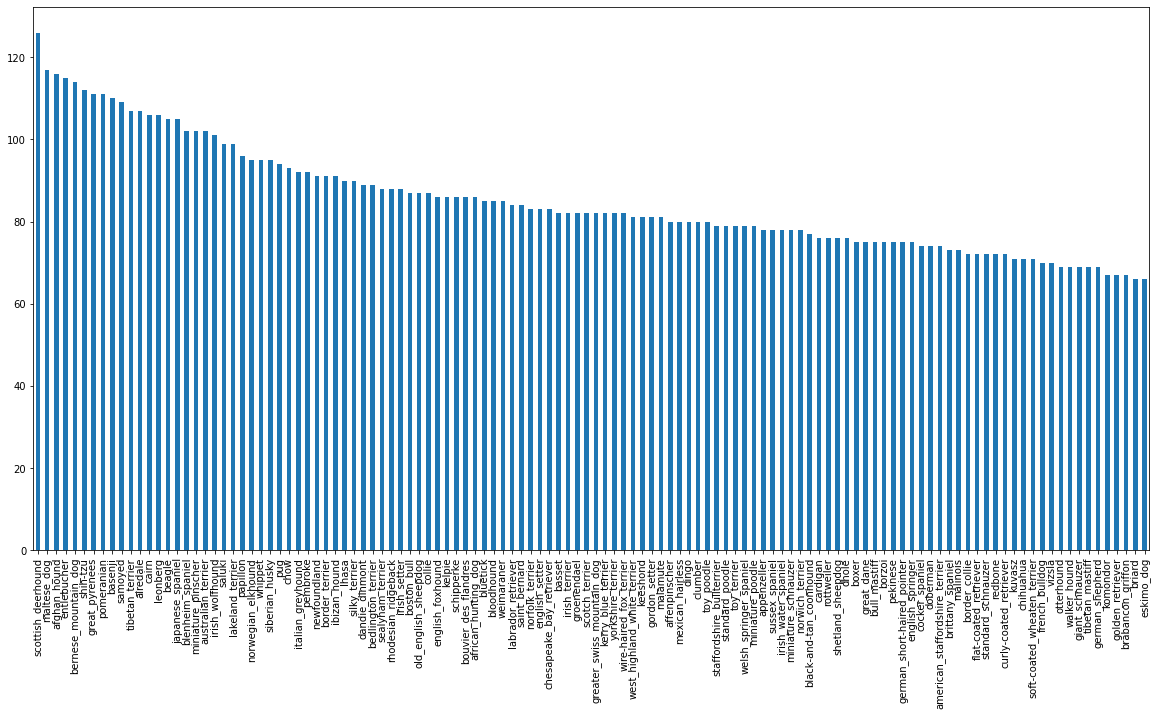

In [ ]:
label_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
# what's median no of dogs per breed
label_csv['breed'].value_counts().median()

82.0

In [ ]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

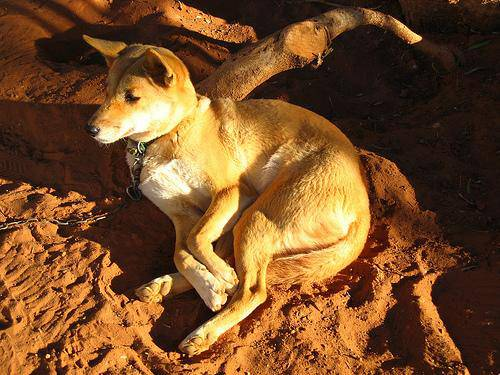

In [ ]:
# lets view an image
from IPython.display import Image
Image('drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [ ]:
# looping through filenames
filenames = ['drive/My Drive/Dog vision/train/' + fname + '.jpg' for fname in label_csv['id']]

# check files
filenames[:10]

['drive/My Drive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether file nos matches the actual images
import os
if len(os.listdir('drive/My Drive/Dog vision/train/')) == len(filenames):
  print('all clear')
else:
  print("they don't match")

all clear


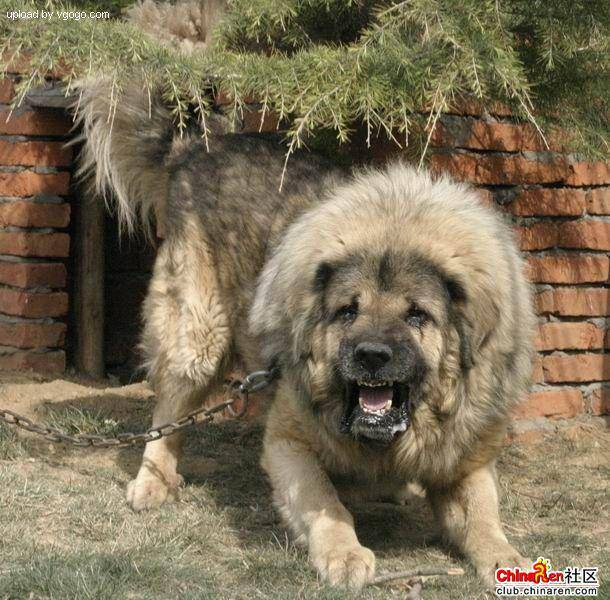

In [ ]:
Image(filenames[9000])

In [ ]:
label_csv['breed'][9000]

'tibetan_mastiff'

Since now we've got our training image filepaths in a list, let's prepare our labels

In [ ]:
import numpy as np
labels = label_csv['breed'].to_numpy()
# labels = label_csv['breed']
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# check whether no of labels is same
if len(labels) == len(filenames):
  print('no of labels = no of filenames')
else:
  print("they're not same")

no of labels = no of filenames


In [ ]:
# find the unique breeds
unique_breed = np.unique(labels)
len(unique_breed)

120

In [ ]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# turn a single label into array of boolean
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn every label into boolean array
boolean_lab = [label == unique_breed for label in labels]
boolean_lab[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turning boolean into numbers
print(labels[0])
print(np.where(labels[0] == unique_breed))
print(boolean_lab[0].argmax())
print(boolean_lab[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(np.where(labels[0] == unique_breed)[0])

[19]


### creating our own validation set
since the data from kaggle doesn't consist of validation set, we create our own

We're going to start off experimenting with 1000 images and inc as needed

In [ ]:
# select no of images to use
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, step:1000}


In [ ]:
# lets split data into train and valid
from sklearn.model_selection import train_test_split

x = filenames
y = boolean_lab

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES],
                                                  test_size=0.2, random_state=42)

len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
# check data
x_train[:5], y_train[:2]

(['drive/My Drive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (turning images to tensors)
To preprocess the images to tensors, we're writing a func to do:
1. take image file path as i/p
2. Tensorflow to reead the file and save it to a var `image`.
3. turn our `image`(jpg) into tensors
4. normalize the image (convert colour channel val. from 0-255 to 0-1)
5. resize the `image` to shape (224, 224)
6. return themod. image

## Before we do, lets see what importing an image looks like

In [ ]:
# convert an image into numpy
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

### back to preproccessing

In [ ]:
# def image size
IMG_SIZE = 224

def process_image(image_path):
  """
  takes an image filepath and converts the image into tensor.
  """
  # read an image file
  image = tf.io.read_file(image_path)

  # turn jpeg into num tensors with 3 colour channels (red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # convert colour channels from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

  # resize the image to desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## turning our data into batches
Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label


Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! We've got our data in batches, more specifically, they're in Tensor pairs of (images, labels) ready for use on a GPU.

But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.

## Visualizing data batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breed[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")


To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the as_numpy_iterator() method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to next() will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**Note**: Running the cell below and loading images may take a little while.

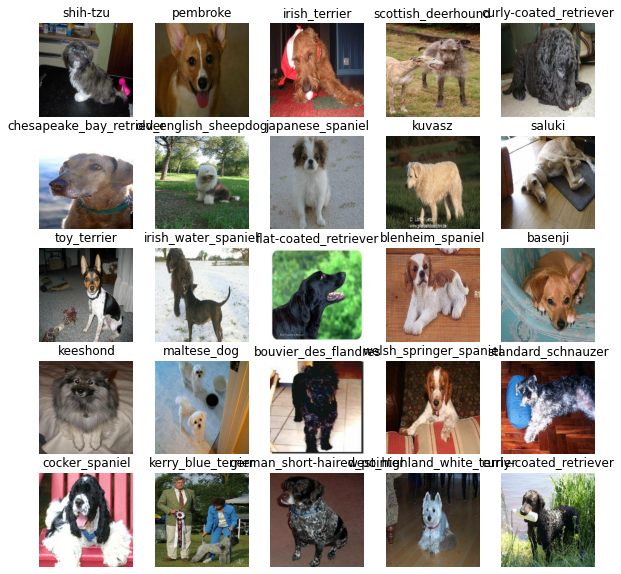

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

**Question**: Rerun the cell above, why do you think a different set of images is displayed each time you run it?

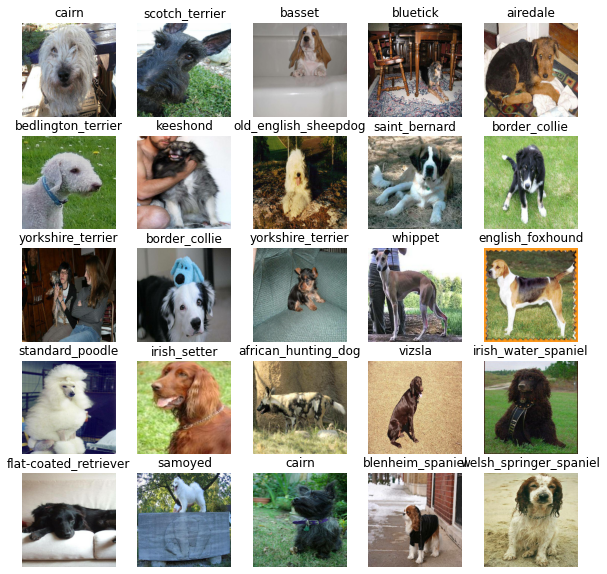

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
val_labels[4]

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

**Question**: Why does running the cell above and viewing validation images return the same dogs each time?

# **Creating and training a model**
Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

### **Why use a pretrained model?**
Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.

### **How do we choose a model?**
Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

## **Building a model**
Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breed) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.  https://www.tensorflow.org/guide/keras/sequential_model

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.
We'll take a look at the code first, then dicuss each part.

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

What's happening here?

### **Setting up the model layers**
There are two ways to do this in Keras, the functional and sequential API. We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (hub.KerasLayer(MODEL_URL). So our first layer is actually an entire model (many more layers). This input layer takes in our images and finds patterns in them based on the patterns mobilenet_v2_130_224 has found.

The next layer (tf.keras.layers.Dense()) is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The activation="softmax" parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use activation="sigmoid".

For more on which activation function to use, see the article Which Loss and Activation Functions Should I Use?

### **Compiling the model**
This one is best explained with a story.

Let's say you're at the international hill descending championships. Where your start standing on top of a hill and your goal is to get to the bottom of the hill. The catch is you're blindfolded.

Luckily, your friend Adam is standing at the bottom of the hill shouting instructions on how to get down.

At the bottom of the hill there's a judge evaluating how you're doing. They know where you need to end up so they compare how you're doing to where you're supposed to be. Their comparison is how you get scored.

Transferring this to model.compile() terminology:

* loss - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
* optimizer - Your friend Adam is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the Adam optimizer is a great general which performs well on most models. Other optimizers include RMSprop and Stochastic Gradient Descent.
* metrics - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.

### **Building the model**
We use model.build() whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is [None, IMG_SIZE, IMG_SIZE, 3] or [None, 224, 224, 3] or [batch_size, img_height, img_width, color_channels].

Batch size is left as None as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call summary() on our model to get idea of what our model looks like.

In [ ]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


The non-trainable parameters are the patterns learned by mobilenet_v2_130_224 and the trainable parameters are the ones in the dense layer we added.

This means the main bulk of the information in our model has already been learned and we're going to take that and adapt it to our own problem.


## **Creating callbacks**
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

### TensorBoard Callback
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
3. Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### **Early Stopping Callback**
Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements


## **Training a model (on a subset of data)**
Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If NUM_EPOCHS=1, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for NUM_EPOCHS?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set NUM_EPOCHS to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [ ]:
# Check again if GPU is available (otherwise computing will take a looooonnnnggggg time)
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESS!!!!)


In [ ]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Boom! We've got a GPU running and NUM_EPOCHS setup. Let's create a simple function which trains a model. The function will:

* Create a model using create_model().
* Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
* Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model

**Note**: When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised. Using more data will generally take longer, which is why we've started with ~1000 images. After the first epoch, subsequent epochs should take a few seconds.

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 666s 27s/step - loss: 4.5072 - accuracy: 0.1063 - val_loss: 3.4402 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 6s 254ms/step - loss: 1.5734 - accuracy: 0.7125 - val_loss: 2.1649 - val_accuracy: 0.5350
Epoch 3/100
25/25 [==============================] - 6s 250ms/step - loss: 0.5368 - accuracy: 0.9312 - val_loss: 1.6794 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 6s 254ms/step - loss: 0.2453 - accuracy: 0.9912 - val_loss: 1.5003 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 6s 254ms/step - loss: 0.1432 - accuracy: 0.9987 - val_loss: 1.4221 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 6s 251ms/step - loss: 0.0979 - accuracy: 1.0000 - val_loss: 1.3801 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================

**Question**: It looks like our model might be overfitting (getting far better results on the training set than the validation set), what are some ways to prevent model overfitting? **Hint**: this may involve searching something like "ways to prevent overfitting in a deep learning model?".

**Note**: Overfitting to begin with is a good thing. It means our model is learning something.

### **Checking the TensorBoard logs**
Now our model has been trained, we can make its performance visual by checking the TensorBoard logs.

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and viualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/logs

<IPython.core.display.Javascript object>


Thanks to our early_stopping callback, the model stopped training after 26 or so epochs (in my case, yours might be slightly different). This is because the validation accuracy failed to improve for 3 epochs.

But the good new is, we can definitely see our model is learning something. The validation accuracy got to 65% in only a few minutes.

This means, if we were to scale up the number of images, hopefully we'd see the accuracy increase.

## **Making and evaluating predictions using a trained model**
Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling predict() on it and passing it data in the same format the model was trained on.

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 1s 166ms/step


array([[4.6647736e-04, 4.2509753e-05, 9.2356227e-04, ..., 5.9828738e-04,
        1.5535765e-05, 3.8824484e-03],
       [6.5696789e-03, 8.9584856e-04, 5.6825797e-03, ..., 3.1118569e-04,
        6.6821603e-04, 5.1782292e-05],
       [3.0968731e-05, 2.2437675e-04, 1.2707802e-04, ..., 3.5706576e-05,
        3.4684359e-05, 1.3349771e-03],
       ...,
       [1.1092334e-05, 5.1237774e-05, 4.7188318e-05, ..., 3.8505641e-05,
        9.2448325e-05, 2.6896658e-05],
       [2.9757516e-03, 8.9158872e-05, 4.8957831e-05, ..., 3.1486736e-05,
        2.8593800e-05, 3.5783572e-03],
       [5.0232024e-04, 1.8806644e-05, 1.3326565e-03, ..., 2.8329147e-03,
        8.4189133e-04, 5.1744623e-06]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(200, 120)

Making predictions with our model returns an array with a different value for each label.

In this case, making predictions on the validation data (200 images) returns an array (predictions) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.

Let's see how we'd convert an array of probabilities into an actual label.

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breed[np.argmax(predictions[0])]}") # the predicted label

[4.66477359e-04 4.25097533e-05 9.23562271e-04 9.62357299e-05
 7.96839013e-05 1.88164154e-06 4.37876359e-02 1.34161930e-03
 1.40026954e-04 3.93762202e-05 9.15518467e-05 1.19910968e-04
 3.89135617e-04 2.73041278e-05 4.40561016e-05 3.68750450e-04
 1.12677026e-05 4.69776124e-01 4.30093451e-06 3.89663837e-05
 2.06998244e-04 9.31254617e-05 2.72787529e-05 5.63888019e-03
 7.14826729e-06 2.81578978e-04 1.51732519e-01 3.13760393e-05
 8.95395133e-05 1.07122571e-04 1.75061927e-04 7.97561370e-04
 2.34107763e-04 2.94217043e-05 1.66410682e-04 1.37049267e-02
 4.52550637e-07 5.38905908e-04 6.03650988e-05 8.24892486e-05
 6.74686104e-04 2.88293104e-05 3.31214724e-05 7.43172786e-05
 3.25512224e-06 5.45029252e-05 1.61528969e-05 2.61580892e-04
 6.58539007e-04 2.06692988e-04 9.99065524e-05 3.30695220e-05
 2.44468189e-04 4.16335060e-05 5.74137630e-05 7.14007474e-05
 2.68053875e-04 9.11708828e-03 5.51907753e-04 5.01358919e-02
 1.14093382e-04 1.24569942e-05 5.45670569e-04 5.74184742e-05
 3.62614839e-04 9.355381

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

**Note**: Prediction probabilities are also known as confidence levels.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'


Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

Remember, the model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

Let's make a small function to do so.

In [ ]:
images_ = []
labels_ = []
# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(unique_breed[np.argmax(label)])

In [ ]:
# predictions vs actual label
get_pred_label(predictions[0]), get_pred_label(labels_[0])

('border_terrier', 'affenpinscher')

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Nailed it!

Now we've got ways to get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [ ]:
def plot_pred(prediction_prob, labels, images, n=1):
  """"
  view the predictions, ground truth label and image for sample n.
  """
  pred_prob, true_lab, image = prediction_prob[n], labels[n], images[n]

  # get pred label
  pred_lab = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_lab == true_lab:
    color = 'green'
  else:
    color = 'red'

  plt.title("{} {:2.0f}% ({})".format(pred_lab,
                                      np.max(pred_prob)*100,
                                      true_lab),
                                      color=color)

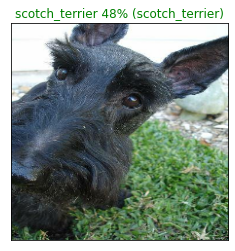

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_prob=predictions,
          labels=val_labels,
          images=val_images)

Nice! Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:

1. Take an input of a prediction probabilities array, a ground truth labels array and an integer.
2. Find the predicted label using get_pred_label().
3. Find the top 10:
    * Prediction probabilities indexes
    * Prediction probabilities values
    * Prediction labels
4. Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
predictions[0]

array([4.66477359e-04, 4.25097533e-05, 9.23562271e-04, 9.62357299e-05,
       7.96839013e-05, 1.88164154e-06, 4.37876359e-02, 1.34161930e-03,
       1.40026954e-04, 3.93762202e-05, 9.15518467e-05, 1.19910968e-04,
       3.89135617e-04, 2.73041278e-05, 4.40561016e-05, 3.68750450e-04,
       1.12677026e-05, 4.69776124e-01, 4.30093451e-06, 3.89663837e-05,
       2.06998244e-04, 9.31254617e-05, 2.72787529e-05, 5.63888019e-03,
       7.14826729e-06, 2.81578978e-04, 1.51732519e-01, 3.13760393e-05,
       8.95395133e-05, 1.07122571e-04, 1.75061927e-04, 7.97561370e-04,
       2.34107763e-04, 2.94217043e-05, 1.66410682e-04, 1.37049267e-02,
       4.52550637e-07, 5.38905908e-04, 6.03650988e-05, 8.24892486e-05,
       6.74686104e-04, 2.88293104e-05, 3.31214724e-05, 7.43172786e-05,
       3.25512224e-06, 5.45029252e-05, 1.61528969e-05, 2.61580892e-04,
       6.58539007e-04, 2.06692988e-04, 9.99065524e-05, 3.30695220e-05,
       2.44468189e-04, 4.16335060e-05, 5.74137630e-05, 7.14007474e-05,
      

In [ ]:
# returns the indexs of elements in ascending order
predictions[0].argsort()

array([ 36,   5,  44, 101,  18, 115,  24,  92,  84,  16,  61, 112, 118,
        46, 108,  22,  13,  41,  33,  27, 107,  51,  42,  69,  19,   9,
        53,   1,  14,  86, 113,  45,  54,  63,  38,  75,  66,  55,  43,
         4,  39,  28,  10,  21,   3,  50,  99,  29,  96,  60,  11,   8,
        72,  82,  34,  30, 114, 105,  71,  93,  49,  20,  94,  32,  74,
       104,  52,  78,  47,  56,  25, 111,  85,  91,  67,  64,  15,  12,
        98,  89,   0,  95,  37,  62,  58,  90, 117,  48,  40,  80,  31,
         2, 116,  76,  87, 110,   7,  88,  81,  97, 100,  83,  77, 119,
        23,  57,  65,  73,  68,  35, 109,  70,  79, 102, 106,   6,  59,
       103,  26,  17])

In [ ]:
# returns the last 10 (top 10) elements' index
predictions[0].argsort()[-10:][::-1]

array([ 17,  26, 103,  59,   6, 106, 102,  79,  70, 109])

In [ ]:
# returns the last 10 (top 10) elements
predictions[0][ predictions[0].argsort()[-10:][::-1] ]

array([0.46977612, 0.15173252, 0.05717019, 0.05013589, 0.04378764,
       0.03151095, 0.03009368, 0.02742364, 0.02296682, 0.0141461 ],
      dtype=float32)

In [ ]:
predictions[0].max()

0.46977612

In [ ]:
import numpy as np

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

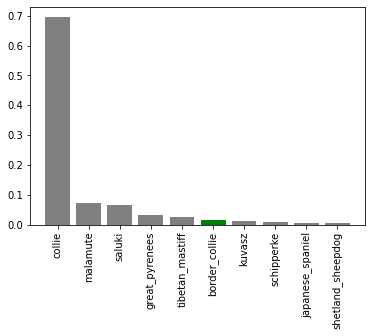

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Wonderful! Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

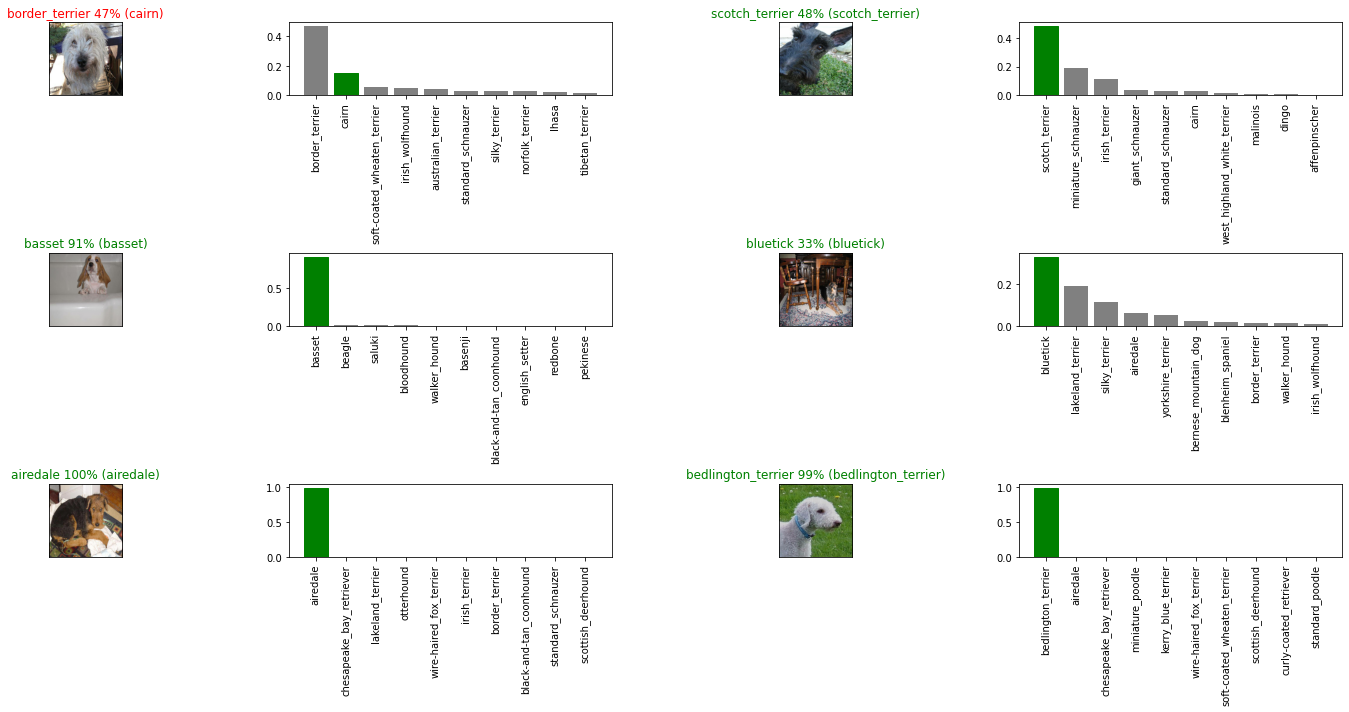

In [ ]:
i_multiplier = 0
num_row = 3
num_col = 2
num_img = num_row * num_col

plt.figure(figsize=(5*2*num_col, 5*num_col))
for i in range(num_img):
  plt.subplot(num_row, 2 * num_col, 2*i+1)
  plot_pred(prediction_prob=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)

  plt.subplot(num_row, 2*num_col, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## **Saving and reloading a model**
After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """

  # Create model directory with current time
  modeldir = os.path.join('drive/My Drive/Dog vision/models', datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  modelpath = modeldir + '-' + suffix + '.h5'   # save format of model
  print(f"Saving model to: {modelpath}...")
  model.save(modelpath)
  return modelpath


If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the tf.keras.models.load_model() function to load it into the notebook.

Because we're using a component from TensorFlow Hub (hub.KerasLayer) we'll have to pass this as a parameter to the custom_objects parameter.

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Dog vision/models/20200731-14461596206774-1000-images-Adam.h5...


'drive/My Drive/Dog vision/models/20200731-14461596206774-1000-images-Adam.h5'

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('drive/My Drive/Dog vision/models/20200730-20501596142247-1000-images-Adam.h5')

Loading saved model from: drive/My Drive/Dog vision/models/20200730-20501596142247-1000-images-Adam.h5


## **Training a model (on the full data)**
Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.

In [ ]:
len(x),len(y)

(10222, 10222)

There we go! We've got over 10,000 images and labels in our training set.

Before we can train a model on these, we'll have to turn them into a data batch.

The beautiful thing is, we can use our create_data_batches() function from above which also preprocesses our images for us (thank you past us for writing a helpful function).

In [ ]:
# Turn full training data in a data batch
full_data = create_data_batches(x, y)

Creating training data batches...



Our data is in a data batch, all we need now is a model.

And surprise, we've got a function for that too! Let's use create_model() to instantiate another model.

In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


# rough work

In [ ]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(([1, 2, 7], [3, 4, 8], [5, 6, 9]))
list(dataset.as_numpy_iterator())

[(1, 3, 5), (2, 4, 6), (7, 8, 9)]